In [1]:
import pandas as pd
df = pd.read_csv('gold_price_data.csv')

In [2]:
print(df.head())

         date       open       high        low      close  adj_close    volume
0  2004-11-18  44.380001  44.380001  44.490002  44.070000  44.430000   5992000
1  2004-11-19  44.779999  44.779999  44.919998  44.470001  44.490002  11655300
2  2004-11-22  44.950001  44.950001  44.970001  44.740002  44.750000  11996000
3  2004-11-23  44.750000  44.750000  44.919998  44.720001  44.880001   3169200
4  2004-11-24  45.049999  45.049999  45.049999  44.790001  44.930000   6105100


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5215 entries, 0 to 5214
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       5215 non-null   object 
 1   open       5215 non-null   float64
 2   high       5215 non-null   float64
 3   low        5215 non-null   float64
 4   close      5215 non-null   float64
 5   adj_close  5215 non-null   float64
 6   volume     5215 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 285.3+ KB
None


In [4]:
print(df.isnull().sum())

date         0
open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64


In [5]:
print(df.describe())

              open         high          low        close    adj_close  \
count  5215.000000  5215.000000  5215.000000  5215.000000  5215.000000   
mean    131.940968   131.940968   132.570993   131.256556   131.939183   
std      51.291094    51.291094    51.459284    51.073175    51.282084   
min      41.259998    41.259998    41.360001    41.020000    41.029999   
25%     104.730000   104.730000   105.355000   104.160000   104.754997   
50%     124.400002   124.400002   124.870003   123.980003   124.459999   
75%     164.779999   164.779999   165.489998   164.004997   164.544998   
max     316.290009   316.290009   317.630005   315.040009   317.489990   

             volume  
count  5.215000e+03  
mean   9.423568e+06  
std    6.645282e+06  
min    3.193000e+05  
25%    5.305150e+06  
50%    7.818800e+06  
75%    1.154915e+07  
max    9.380420e+07  


In [6]:
print(df.dtypes)

date          object
open         float64
high         float64
low          float64
close        float64
adj_close    float64
volume         int64
dtype: object


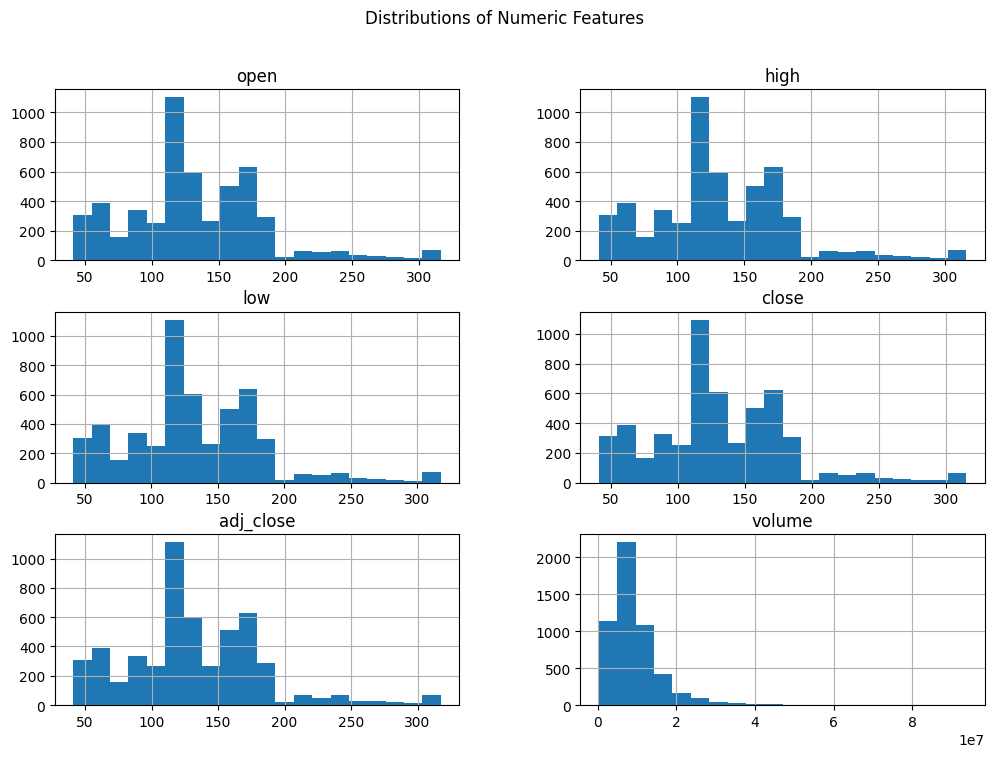

In [8]:
import matplotlib.pyplot as plt
df.hist(figsize=(12, 8), bins=20)
plt.suptitle("Distributions of Numeric Features")
plt.show()

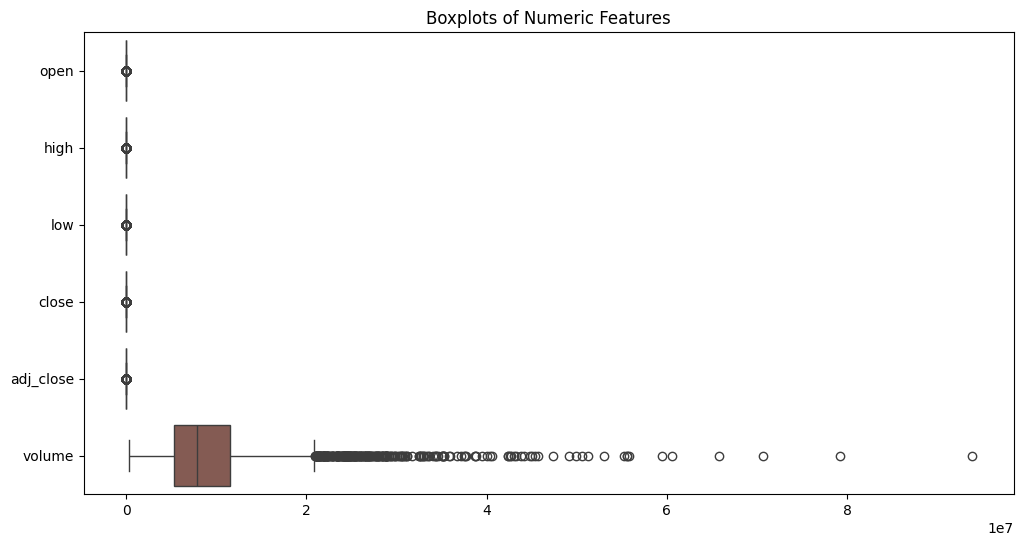

In [10]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="h")
plt.title("Boxplots of Numeric Features")
plt.show()

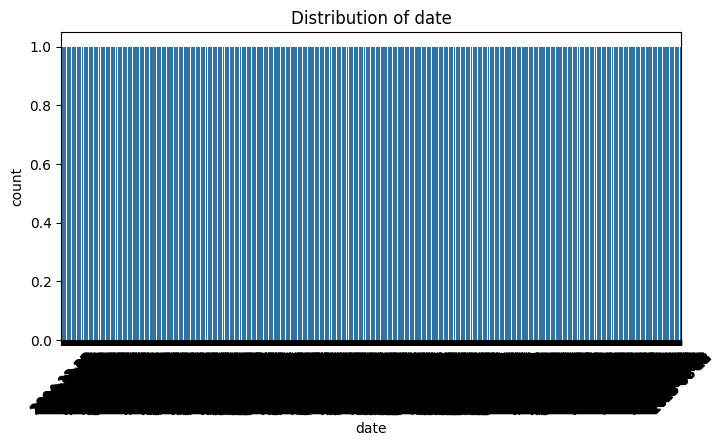

In [11]:
categorical_cols = df.select_dtypes(include=["object", "category"]).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

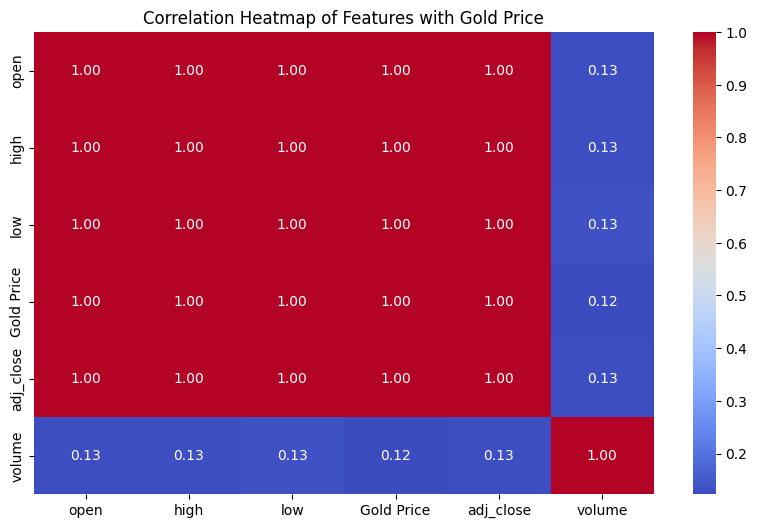

In [12]:
df = df.rename(columns={"close": "Gold Price"})
numeric_df = df.select_dtypes(include=["float64", "int64"])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Features with Gold Price")
plt.show()

In [13]:
X = df[["open", "high", "low", "adj_close", "volume"]]
y = df["Gold Price"]

print("Independent Variables (X):")
print(X.head())

print("\nTarget Variable (y):")
print(y.head())

Independent Variables (X):
        open       high        low  adj_close    volume
0  44.380001  44.380001  44.490002  44.430000   5992000
1  44.779999  44.779999  44.919998  44.490002  11655300
2  44.950001  44.950001  44.970001  44.750000  11996000
3  44.750000  44.750000  44.919998  44.880001   3169200
4  45.049999  45.049999  45.049999  44.930000   6105100

Target Variable (y):
0    44.070000
1    44.470001
2    44.740002
3    44.720001
4    44.790001
Name: Gold Price, dtype: float64


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (4172, 5) (4172,)
Testing set shape: (1043, 5) (1043,)


In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

coefficients = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": lr_model.coef_
})
print("Linear Regression Coefficients:")
print(coefficients)

print("\nIntercept:", lr_model.intercept_)

Linear Regression Coefficients:
     Feature   Coefficient
0       open  3.618257e-01
1       high  3.618257e-01
2        low -3.520350e-01
3  adj_close  6.258093e-01
4     volume -2.883189e-08

Intercept: 0.14864427880834796


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict on test set
y_pred = lr_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)

# Display results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")


Mean Squared Error (MSE): 0.1351
Root Mean Squared Error (RMSE): 0.3676
R² Score: 0.9999


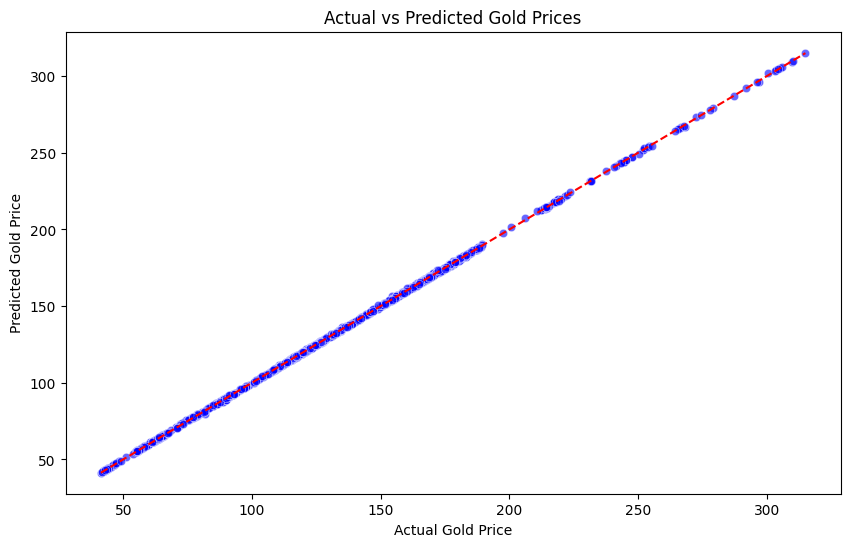

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on test set
y_pred = lr_model.predict(X_test)

# Plot Actual vs Predicted
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
plt.xlabel("Actual Gold Price")
plt.ylabel("Predicted Gold Price")
plt.title("Actual vs Predicted Gold Prices")
plt.show()


In [19]:
import pandas as pd

# Create a DataFrame of features and coefficients
coefficients = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": lr_model.coef_
})

# Sort by absolute value of coefficient
coefficients["Impact"] = coefficients["Coefficient"].abs()
coefficients = coefficients.sort_values(by="Impact", ascending=False)

print(coefficients)


     Feature   Coefficient        Impact
3  adj_close  6.258093e-01  6.258093e-01
0       open  3.618257e-01  3.618257e-01
1       high  3.618257e-01  3.618257e-01
2        low -3.520350e-01  3.520350e-01
4     volume -2.883189e-08  2.883189e-08
